In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))\
        


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/metacritic-videogames-data/games-data.csv


In [2]:
game_scores = pd.read_csv('/kaggle/input/metacritic-videogames-data/games-data.csv')
game_scores.head()

,name,platform,r-date,score,user score,developer,genre,players,critics,users
0,The Legend of Zelda: Ocarina of Time,Nintendo64,"November 23, 1998",99,9.1,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647
2,Grand Theft Auto IV,PlayStation3,"April 29, 2008",98,7.6,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806
3,SoulCalibur,Dreamcast,"September 8, 1999",98,8.5,Namco,"Action,Fighting,3D",1-2,24,324
4,Grand Theft Auto IV,Xbox360,"April 29, 2008",98,7.9,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364


In [3]:
game_scores.shape

(17944, 10)

In [4]:
game_scores.columns

Index(['name', 'platform', 'r-date', 'score', 'user score', 'developer',
       'genre', 'players', 'critics', 'users'],
      dtype='object')

In [5]:
game_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17944 entries, 0 to 17943
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        17944 non-null  object
 1   platform    17944 non-null  object
 2   r-date      17944 non-null  object
 3   score       17944 non-null  int64 
 4   user score  17944 non-null  object
 5   developer   17944 non-null  object
 6   genre       17944 non-null  object
 7   players     17922 non-null  object
 8   critics     17944 non-null  int64 
 9   users       17944 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.4+ MB


In [6]:
# first check of null values 
game_scores.isnull().sum()

name           0
platform       0
r-date         0
score          0
user score     0
developer      0
genre          0
players       22
critics        0
users          0
dtype: int64

In [7]:
#replaceing tbd with NaN, since trying to convert user score to in gave an error
game_scores['user score'].replace('tbd', np.nan, inplace = True)

#checking howe many null values. Will not modify, important to keep for analysis sake.
game_scores['user score'].isnull().sum()

1286

In [8]:
#changing score from object to float, them multiplying by 10 to match the meta score
game_scores['user score'] = game_scores['user score'].astype('float') * 10

In [9]:
game_scores.head()

,name,platform,r-date,score,user score,developer,genre,players,critics,users
0,The Legend of Zelda: Ocarina of Time,Nintendo64,"November 23, 1998",99,91.0,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,74.0,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647
2,Grand Theft Auto IV,PlayStation3,"April 29, 2008",98,76.0,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806
3,SoulCalibur,Dreamcast,"September 8, 1999",98,85.0,Namco,"Action,Fighting,3D",1-2,24,324
4,Grand Theft Auto IV,Xbox360,"April 29, 2008",98,79.0,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364


In [10]:
game_scores['user score'].dtype

dtype('float64')

In [11]:
#renaming the columns to be more understandable
game_scores.rename(columns={'score':'critic score', 'critics':'critics amount', 'users':'users amount'}, inplace=True)
game_scores.columns

Index(['name', 'platform', 'r-date', 'critic score', 'user score', 'developer',
       'genre', 'players', 'critics amount', 'users amount'],
      dtype='object')

In [12]:
## percent diffrence between critic score and user score
game_scores['percent_difference'] = abs(game_scores['critic score'] - game_scores['user score']) \
                                    / ((game_scores['critic score'] + game_scores['user score'])/2) * 100
game_scores.head()

,name,platform,r-date,critic score,user score,developer,genre,players,critics amount,users amount,percent_difference
0,The Legend of Zelda: Ocarina of Time,Nintendo64,"November 23, 1998",99,91.0,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749,8.421053
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,74.0,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647,27.906977
2,Grand Theft Auto IV,PlayStation3,"April 29, 2008",98,76.0,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806,25.287356
3,SoulCalibur,Dreamcast,"September 8, 1999",98,85.0,Namco,"Action,Fighting,3D",1-2,24,324,14.207650
4,Grand Theft Auto IV,Xbox360,"April 29, 2008",98,79.0,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364,21.468927


In [13]:
#checking the pltforms that are imcluded in the list. do not include stadia(too little), PS5, XSX(too recent of this dataset.)
game_scores['platform'].value_counts()

PC                 4592
PlayStation4       1928
Xbox360            1666
PlayStation2       1418
PlayStation3       1269
Switch             1122
XboxOne            1118
Xbox                793
DS                  730
Wii                 664
PSP                 513
GameCube            452
GameBoyAdvance      444
3DS                 400
PlayStationVita     257
PlayStation         188
WiiU                186
Dreamcast           125
Nintendo64           70
Stadia                4
PlayStation5          3
XboxSeriesX           2
Name: platform, dtype: int64

In [14]:
# converting the release date to a more easier to work with datetime format.
game_scores['r-date'] = pd.to_datetime(game_scores['r-date'])
game_scores.head()

,name,platform,r-date,critic score,user score,developer,genre,players,critics amount,users amount,percent_difference
0,The Legend of Zelda: Ocarina of Time,Nintendo64,1998-11-23,99,91.0,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749,8.421053
1,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20,98,74.0,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647,27.906977
2,Grand Theft Auto IV,PlayStation3,2008-04-29,98,76.0,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806,25.287356
3,SoulCalibur,Dreamcast,1999-09-08,98,85.0,Namco,"Action,Fighting,3D",1-2,24,324,14.207650
4,Grand Theft Auto IV,Xbox360,2008-04-29,98,79.0,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364,21.468927


In [15]:
## creating a column for just the year
game_scores['r-year'] = pd.DatetimeIndex(game_scores['r-date']).year
game_scores.head()

,name,platform,r-date,critic score,user score,developer,genre,players,critics amount,users amount,percent_difference,r-year
0,The Legend of Zelda: Ocarina of Time,Nintendo64,1998-11-23,99,91.0,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749,8.421053,1998
1,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20,98,74.0,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647,27.906977,2000
2,Grand Theft Auto IV,PlayStation3,2008-04-29,98,76.0,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806,25.287356,2008
3,SoulCalibur,Dreamcast,1999-09-08,98,85.0,Namco,"Action,Fighting,3D",1-2,24,324,14.207650,1999
4,Grand Theft Auto IV,Xbox360,2008-04-29,98,79.0,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364,21.468927,2008


In [16]:
game_scores['r-year'].describe()

count    17944.000000
mean      2010.687918
std          5.933131
min       1995.000000
25%       2006.000000
50%       2011.000000
75%       2016.000000
max       2020.000000
Name: r-year, dtype: float64

In [17]:
# making a separate dataframe with data sorted by user score and percent difference
game_scores_user = game_scores.sort_values(['user score'], ascending=False, axis=0)
game_difference = game_scores.sort_values(['percent_difference'],  ascending=False, axis=0)
game_scores_user.head()

,name,platform,r-date,critic score,user score,developer,genre,players,critics amount,users amount,percent_difference,r-year
4565,GrimGrimoire,PlayStation2,2007-06-26,79,98.0,VanillaWare,"Strategy,Real-Time,Fantasy",1 Player,39,2314,21.468927,2007
4664,Rochard,PlayStation3,2011-09-27,79,97.0,RecoilGames,"Action,Adventure,General,General,Platformer,2D",No info,34,465,20.454545,2011
10265,Tengami,WiiU,2014-11-13,70,97.0,Nyamyam,"Adventure,General",No info,15,675,32.335329,2014
10608,Diaries of a Spaceport Janitor,PC,2016-09-16,69,97.0,SundaeMonth,"Simulation,Virtual,Career",No Online Multiplayer,7,2495,33.734940,2016
8967,After Burner Climax,Xbox360,2010-04-21,72,97.0,SegaAM2,"Simulation,Flight,Modern Jet,Modern Jet,Combat",No info,31,579,29.585799,2010


Already, some diffrences can be seen. Completly different games.

In [18]:
# wow just from the first five rows.... 
game_difference.head()

,name,platform,r-date,critic score,user score,developer,genre,players,critics amount,users amount,percent_difference,r-year
13665,Madden NFL 21,PlayStation4,2020-08-25,63,2.0,EASports,"Sports,Team,Football,Sim",Up to 6,29,5363,187.692308,2020
10570,Madden NFL 21,XboxOne,2020-08-25,69,4.0,EASports,"Sports,Team,Football,Sim",Up to 6,20,994,178.082192,2020
4964,Tom Clancy's The Division 2: Warlords of New York,PC,2020-03-03,79,5.0,MassiveEntertainment,"Action,Shooter,Third-Person,Tactical",No info,19,1498,176.190476,2020
14808,Warcraft III: Reforged,PC,2020-01-28,59,6.0,BlizzardEntertainment,"Strategy,Real-Time,General",Online Multiplayer,46,30532,163.076923,2020
11173,NBA 2K21,PlayStation4,2020-09-04,68,7.0,VisualConcepts,"Sports,Team,Basketball,Arcade",Up to 10,49,446,162.666667,2020


Already, some diffrences can be seen. Completly different games.

In [19]:
#importing the needed libraries
import matplotlib.pyplot as plt
import seaborn as sns

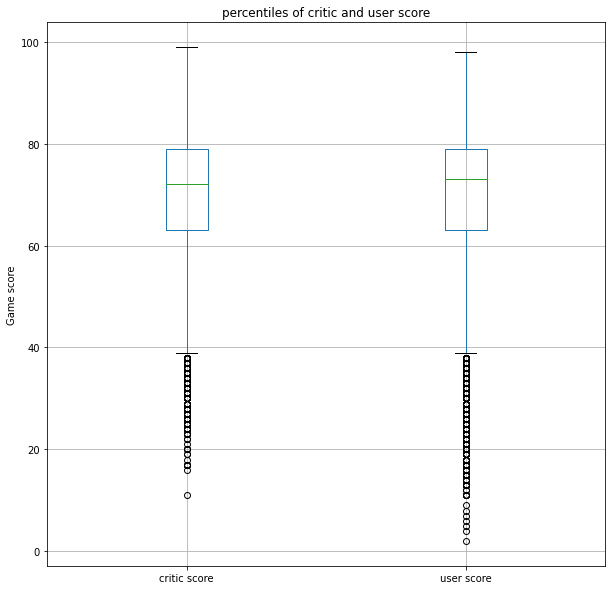

In [20]:
# boxplot of critic and user score
game_scores.boxplot(['critic score', 'user score'], figsize=(10,10))
plt.title('percentiles of critic and user score')
plt.ylabel('Game score')
plt.show()

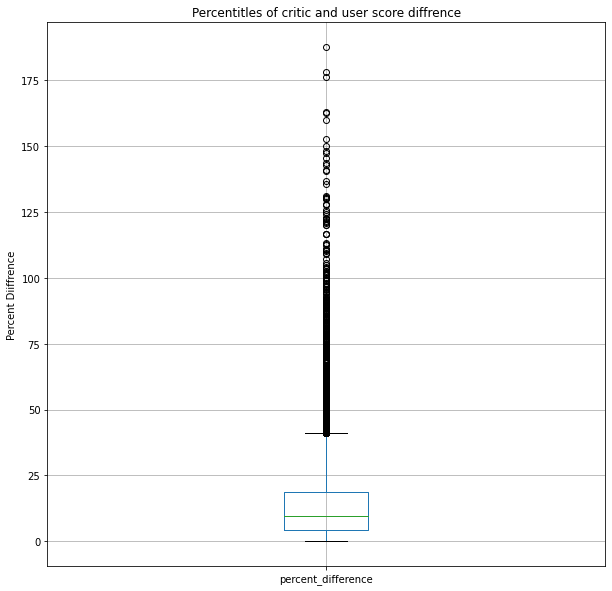

In [21]:
game_scores.boxplot('percent_difference', figsize=(10,10))
plt.title('Percentitles of critic and user score diffrence')
plt.ylabel('Percent Diiffrence')
plt.show()

In [22]:
game_scores['percent_difference'].describe()

count    16658.000000
mean        14.363828
std         15.929651
min          0.000000
25%          4.081633
50%          9.523810
75%         18.867925
max        187.692308
Name: percent_difference, dtype: float64

In [23]:
critics_top_name = game_scores['name'].head(50)
critics_top_score = game_scores['critic score'].head(50)
user_top_name = game_scores_user['name'].head(50)
user_top_score = game_scores_user['user score'].head(50)

Text(0.5, 1.0, 'Top 10 games for users')

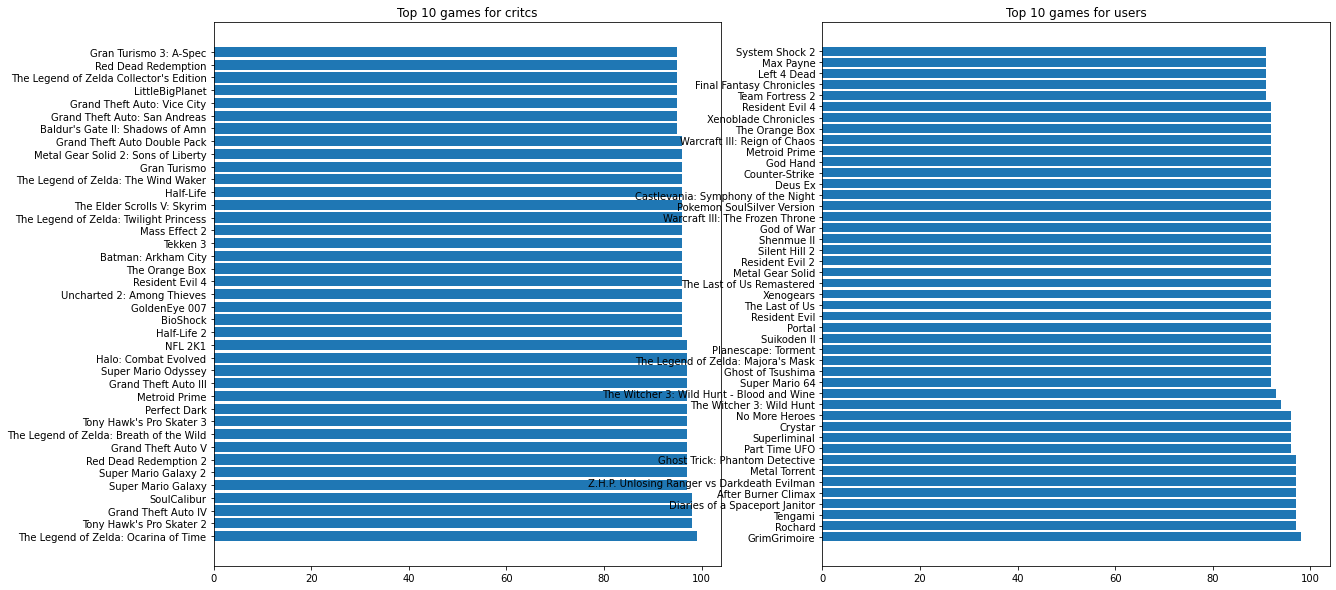

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(20,10))
ax1.barh(critics_top_name,critics_top_score)
ax2.barh(user_top_name,user_top_score)
ax1.set_title('Top 10 games for critcs')
ax2.set_title('Top 10 games for users')

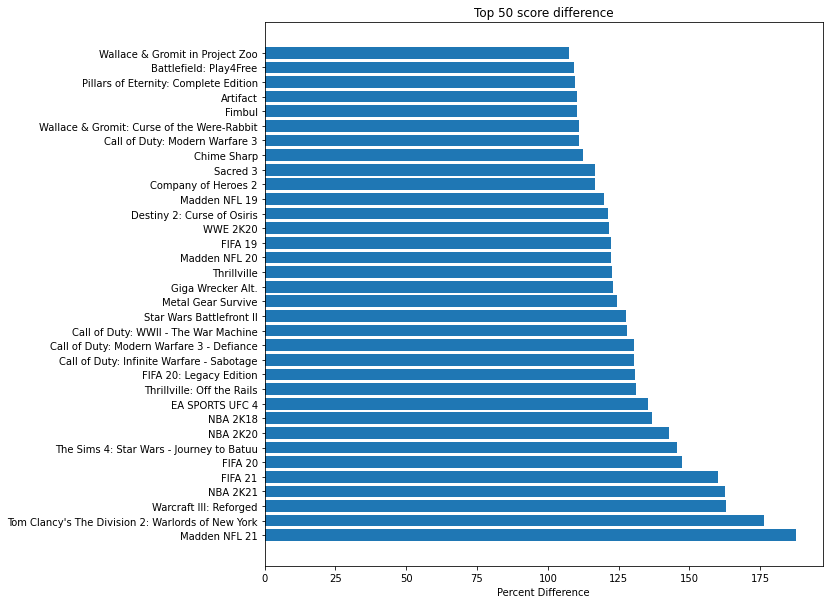

In [25]:
#most of these games came out in the past few years
difference_name = game_difference['name'].head(50)
difference_percent = game_difference['percent_difference'].head(50)
plt.figure(figsize=(10,10))
plt.barh(difference_name, difference_percent)
plt.title('Top 50 score difference')
plt.xlabel('Percent Difference')
plt.show()


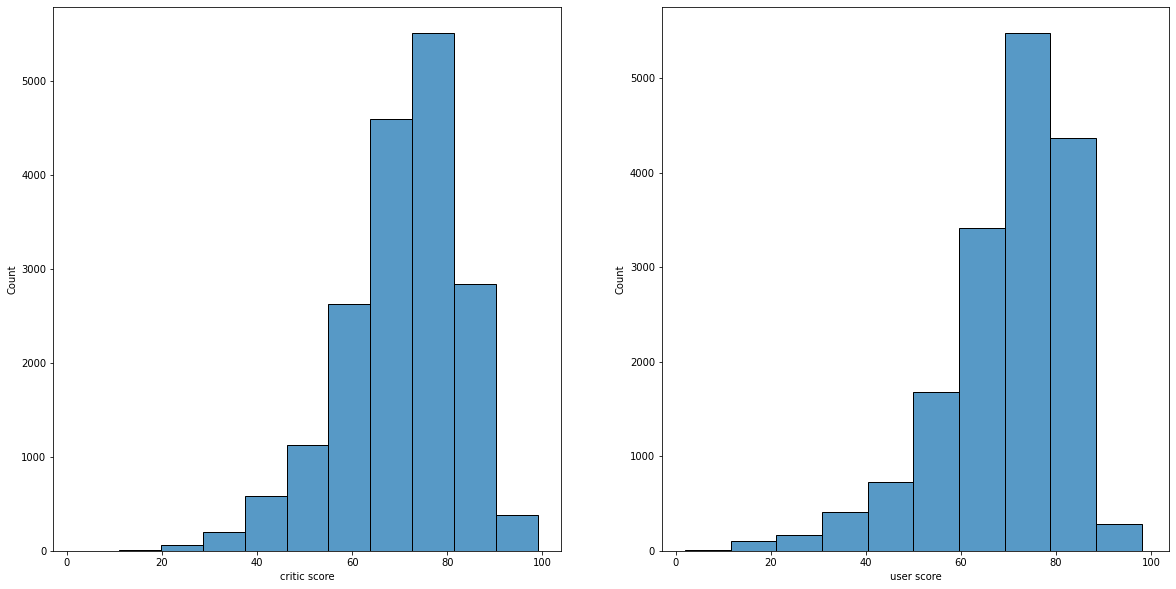

In [26]:
fig, axes = plt.subplots(1,2, sharex=True, figsize=(20,10))
sns.histplot(data=game_scores, x='critic score', ax=axes[0], bins=10)
sns.histplot(data=game_scores, x='user score', ax=axes[1], bins=10)
plt.show()

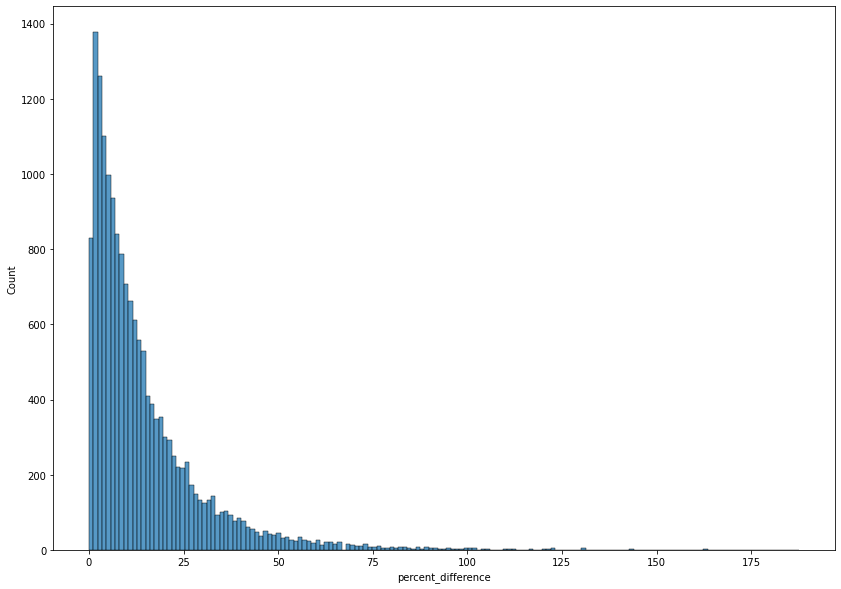

In [27]:
#seems that most games have small percent diffrences.
plt.figure(figsize=(14,10))
sns.histplot(data=game_scores, x='percent_difference',)
plt.show()

time for binning

In [28]:
game_bins= game_scores[['name','r-year']].copy()

In [29]:
# binning critic and user score using metacritic own binning
def get_bins(df, col_name):
    grade_bin=list()
    
    for value in df:
        if value > 0 and value <20:
            grade_bin.append('Overwhelming Dislike')
        elif value >= 20 and value < 50:
            grade_bin.append('Generably Unfavorable')
        elif value >= 50 and value < 75:
            grade_bin.append('Mixed')
        elif value >=75 and value <90:
            grade_bin.append('Generably Favorable')
        else:
            grade_bin.append('Acclaimed')
        
    game_bins[col_name] = grade_bin

get_bins(game_scores['critic score'], 'critic_bin')
get_bins(game_scores['user score'], 'user_bin')
game_bins.head()
#game_bins['critic_bin'] = pd.cut(game_scores['critic score'], bins, labels=group_names, include_lowest=True)
#game_bins['user_bin'] = pd.cut(game_scores['user score'], bins, labels=group_names, include_lowest=True)
#binning percent diffrence(has to be done custom since percentages can have huge results)

,name,r-year,critic_bin,user_bin
0,The Legend of Zelda: Ocarina of Time,1998,Acclaimed,Acclaimed
1,Tony Hawk's Pro Skater 2,2000,Acclaimed,Mixed
2,Grand Theft Auto IV,2008,Acclaimed,Generably Favorable
3,SoulCalibur,1999,Acclaimed,Generably Favorable
4,Grand Theft Auto IV,2008,Acclaimed,Generably Favorable


In [30]:
percent_bin=list()

for value in game_scores['percent_difference']:
    if value >0 and value <= 10:
        percent_bin.append('Small')
    elif value > 10 and value <= 25:
        percent_bin.append('Moderate')
    else:
        percent_bin.append('Large')
        
game_bins['percent_bin'] = percent_bin
game_bins

,name,r-year,critic_bin,user_bin,percent_bin
0,The Legend of Zelda: Ocarina of Time,1998,Acclaimed,Acclaimed,Small
1,Tony Hawk's Pro Skater 2,2000,Acclaimed,Mixed,Large
2,Grand Theft Auto IV,2008,Acclaimed,Generably Favorable,Large
3,SoulCalibur,1999,Acclaimed,Generably Favorable,Moderate
4,Grand Theft Auto IV,2008,Acclaimed,Generably Favorable,Moderate
...,...,...,...,...,...
17939,Vroom in the Night Sky,2017,Overwhelming Dislike,Generably Unfavorable,Large
17940,Leisure Suit Larry: Box Office Bust,2009,Overwhelming Dislike,Overwhelming Dislike,Moderate
17941,Yaris,2007,Overwhelming Dislike,Generably Unfavorable,Large
17942,Ride to Hell: Retribution,2013,Overwhelming Dislike,Overwhelming Dislike,Moderate


In [31]:
year_bin=list()

for year in game_bins['r-year']:
    if year < 2000:
        year_bin.append('1:Late 90s')
    elif year >= 2000 and year < 2005:
        year_bin.append('2:Early 00s')
    elif year >= 2005 and year < 2010:
        year_bin.append('3: Late 00s')
    elif year >= 2010 and year < 2015:
        year_bin.append('4:Early 10s')
    else:
        year_bin.append('5:Late 10s&2020')
game_bins['year_bin'] = year_bin
game_bins.loc[game_bins['r-year'] == 2014]

,name,r-year,critic_bin,user_bin,percent_bin,year_bin
8,Grand Theft Auto V,2014,Acclaimed,Generably Favorable,Moderate,4:Early 10s
16,Grand Theft Auto V,2014,Acclaimed,Generably Favorable,Moderate,4:Early 10s
58,The Last of Us Remastered,2014,Acclaimed,Acclaimed,Small,4:Early 10s
241,Super Smash Bros. for Wii U,2014,Acclaimed,Generably Favorable,Small,4:Early 10s
268,Dark Souls II,2014,Acclaimed,Generably Favorable,Moderate,4:Early 10s
...,...,...,...,...,...,...
17862,Air Conflicts: Vietnam Ultimate Edition,2014,Generably Unfavorable,Overwhelming Dislike,Large,4:Early 10s
17878,Rambo: The Video Game,2014,Generably Unfavorable,Generably Unfavorable,Moderate,4:Early 10s
17887,Basement Crawl,2014,Generably Unfavorable,Generably Unfavorable,Small,4:Early 10s
17903,Tenkai Knights: Brave Battle,2014,Generably Unfavorable,Generably Unfavorable,Moderate,4:Early 10s


Text(0.5, 1.0, 'Percentage rating Categorical')

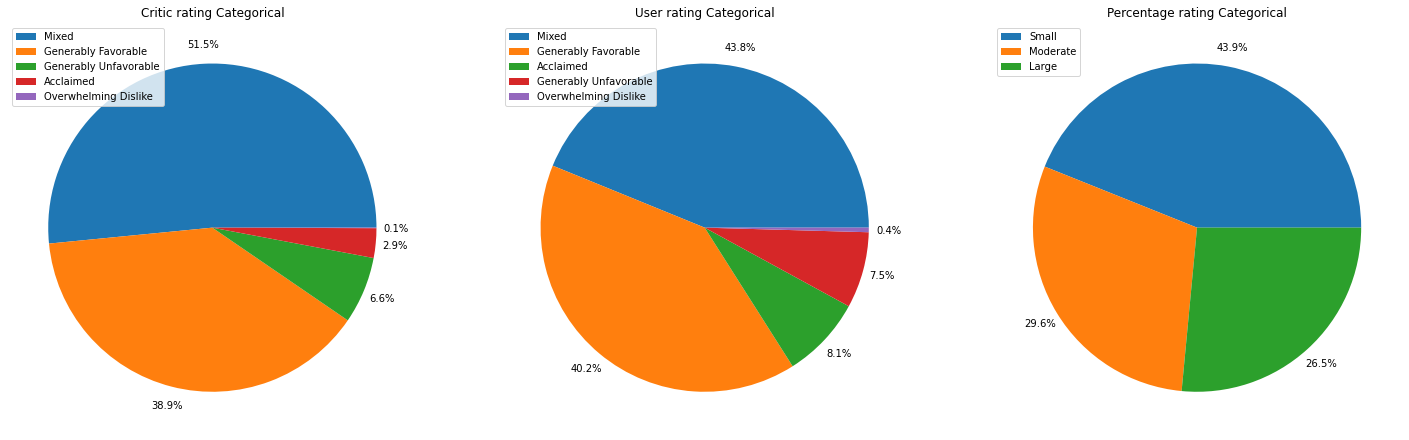

In [32]:
# bar chats(or pier chart) below
fig, (axes) = plt.subplots(1,3, figsize=(25,25))
axes[0].pie(game_bins['critic_bin'].value_counts(), autopct='%1.1f%%', pctdistance=1.12)
axes[0].legend(labels=game_bins['critic_bin'].value_counts().index, loc='upper left')
axes[0].set_title('Critic rating Categorical')
axes[1].pie(game_bins['user_bin'].value_counts(), autopct='%1.1f%%', pctdistance=1.12)
axes[1].legend(labels=game_bins['user_bin'].value_counts().index, loc='upper left')
axes[1].set_title('User rating Categorical')
axes[2].pie(game_bins['percent_bin'].value_counts(), autopct='%1.1f%%', pctdistance=1.12)
axes[2].legend(labels=game_bins['percent_bin'].value_counts().index, loc='upper left')
axes[2].set_title('Percentage rating Categorical')

<AxesSubplot:xlabel='year_bin'>

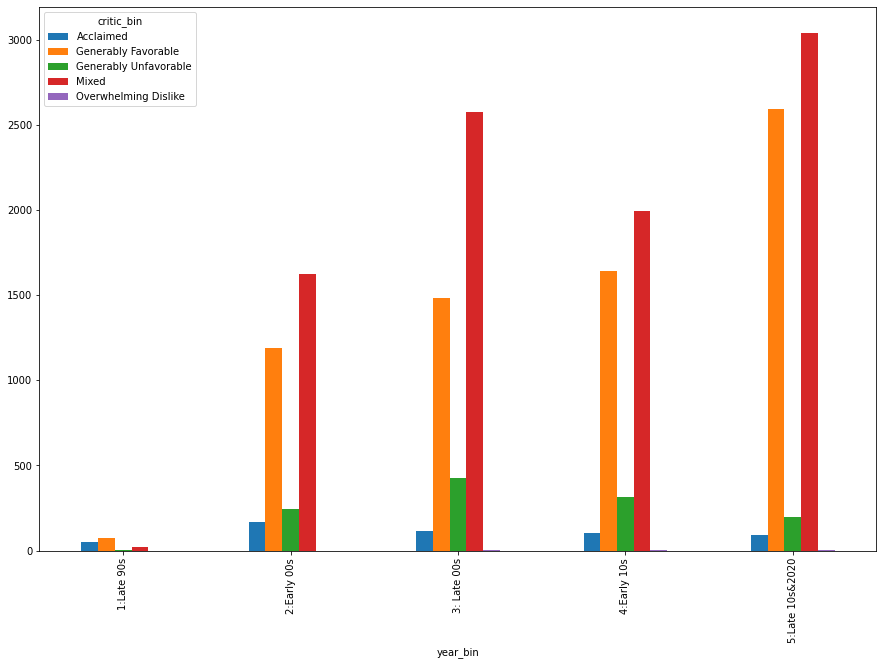

In [33]:
check = game_bins.groupby(['year_bin','critic_bin'])['name'].count().unstack()
check.plot.bar(figsize=(15,10))

<AxesSubplot:xlabel='year_bin'>

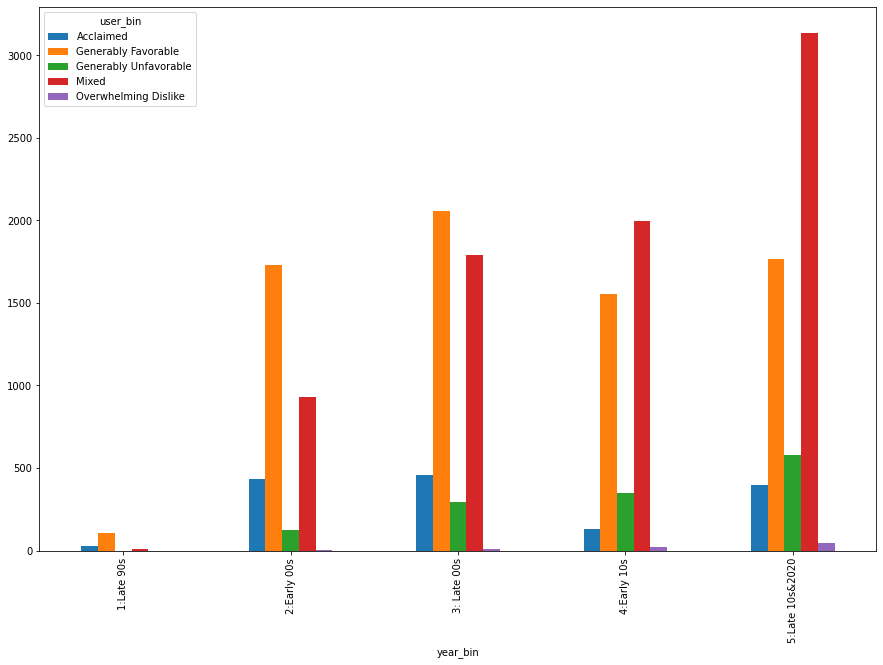

In [34]:
check2 = game_bins.groupby(['year_bin','user_bin'])['name'].count().unstack()
check2.plot.bar(figsize=(15,10))

<AxesSubplot:xlabel='year_bin'>

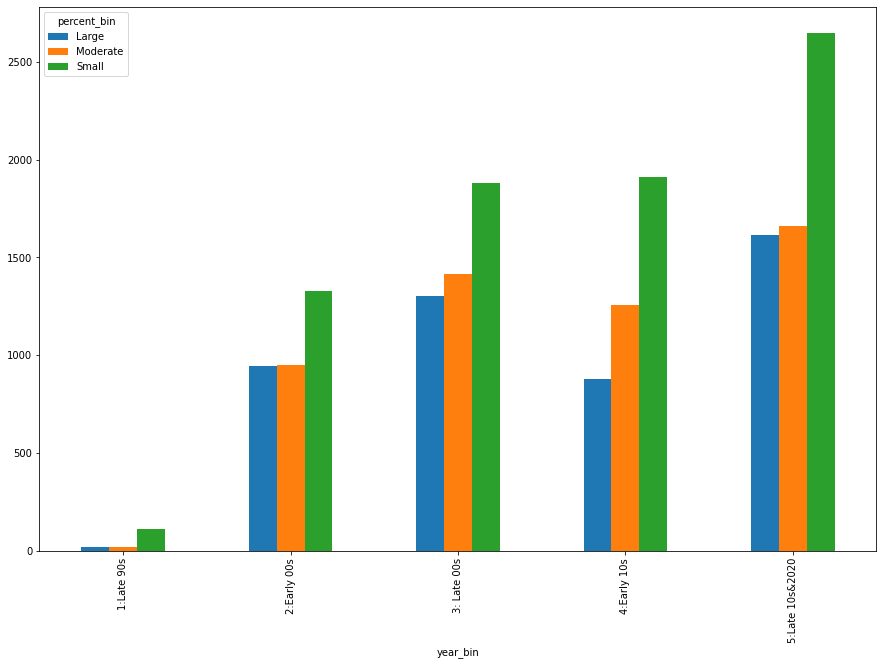

In [35]:
check3 = game_bins.groupby(['year_bin','percent_bin'])['name'].count().unstack()
check3.plot.bar(figsize=(15,10))

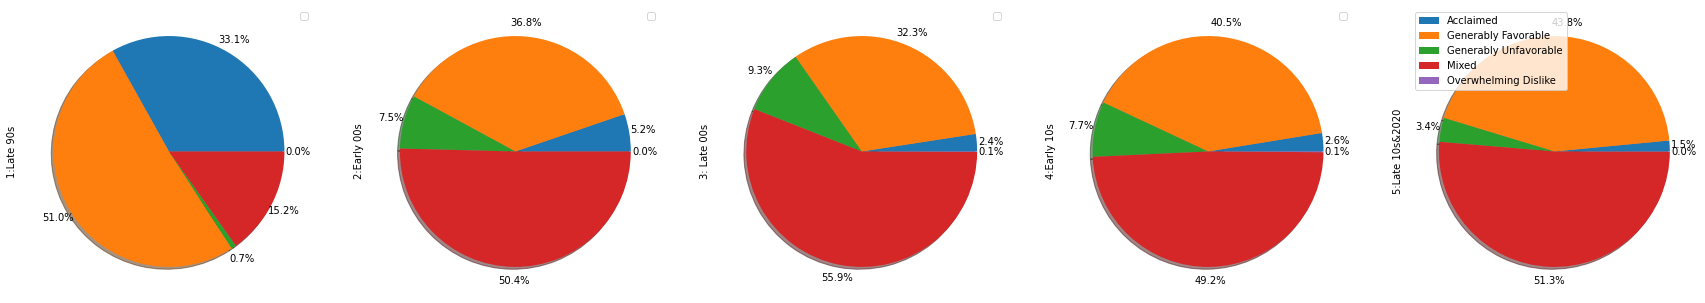

In [36]:
check_t = check.transpose()
check_t.plot.pie(subplots=True, figsize=((30,40)), labels=None, shadow=True, autopct='%1.1f%%', pctdistance=1.12)
plt.legend(labels=check_t.index, loc='upper left')
plt.show()

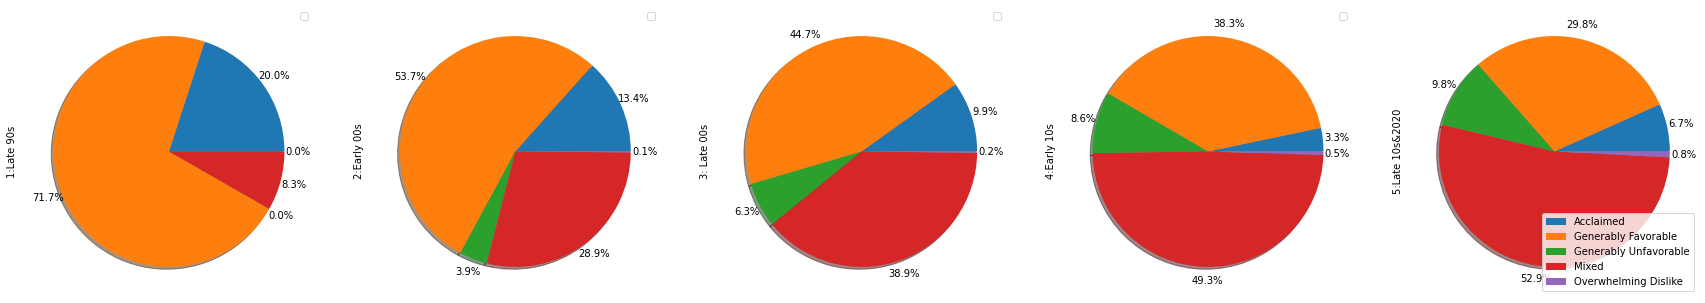

In [37]:
check2_t = check2.transpose()
check2_t.plot.pie(subplots=True, figsize=((30,40)), labels=None, shadow=True, autopct='%1.1f%%', pctdistance=1.12)
plt.legend(labels=check2_t.index, loc='lower right')
plt.show()

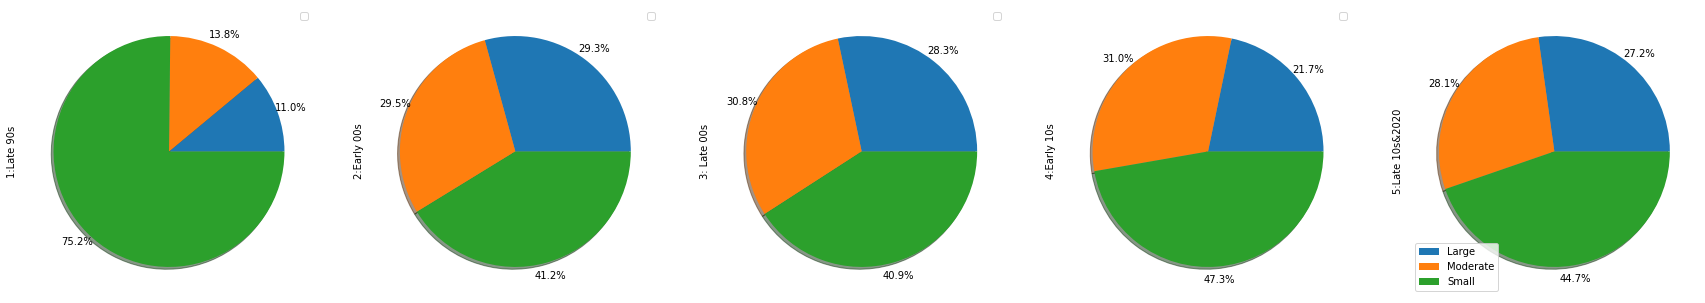

In [38]:
check3_t = check3.transpose()
check3_t.plot.pie(subplots=True, figsize=((30,40)), labels=None, shadow=True, autopct='%1.1f%%', pctdistance=1.12)
plt.legend(labels=check3_t.index, loc='lower left')
plt.show()

In [39]:
console_best = game_scores.groupby('platform')['percent_difference'].mean()
console_best.sort_values(ascending=False, inplace=True)



<AxesSubplot:ylabel='platform'>

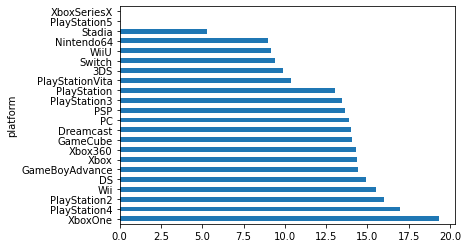

In [40]:
console_best.plot.barh()

In [41]:
# developer bar chart
developer_best= game_scores.groupby('developer')['critic score','user score','percent_difference'].mean()
developer_best['count'] = game_scores.groupby('developer')['name'].count()
developer_best_c = (developer_best.sort_values('critic score', ascending=False)).loc[developer_best['count'] > 2]
developer_best_u = (developer_best.sort_values('user score', ascending=False)).loc[developer_best['count'] > 2]
developer_best_u

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,critic score,user score,percent_difference,count
developer,,,,
RetroStudios,89.428571,88.428571,3.031490,7
CapcomR&DDivision1,91.000000,88.333333,3.720257,3
Inti,79.250000,88.250000,10.783503,4
SiliconDreams,54.000000,88.000000,36.241611,3
LookingGlassStudios,88.000000,88.000000,1.490176,3
...,...,...,...,...
"InfinityWard,SledgehammerGames",84.666667,32.333333,89.558913,3
BigbenInteractive,49.333333,32.000000,46.779634,3
"HighVoltageSoftware,BackboneEntertainment",37.666667,31.000000,33.304854,3


In [42]:
#year histogram
years_avg = game_scores.groupby('r-year')['critic score','user score','percent_difference'].mean()
years_avg

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,critic score,user score,percent_difference
r-year,,,
1995,86.000000,86.000000,0.000000
1996,85.450000,83.550000,7.159252
1997,85.185185,84.592593,5.940481
1998,82.466667,83.953488,5.908057
1999,83.423077,84.764706,7.886158
2000,72.011268,75.931373,13.238858
2001,71.382784,75.244353,12.467120
2002,69.720102,74.321157,13.844611
2003,70.339088,75.466484,13.460243


<BarContainer object of 26 artists>

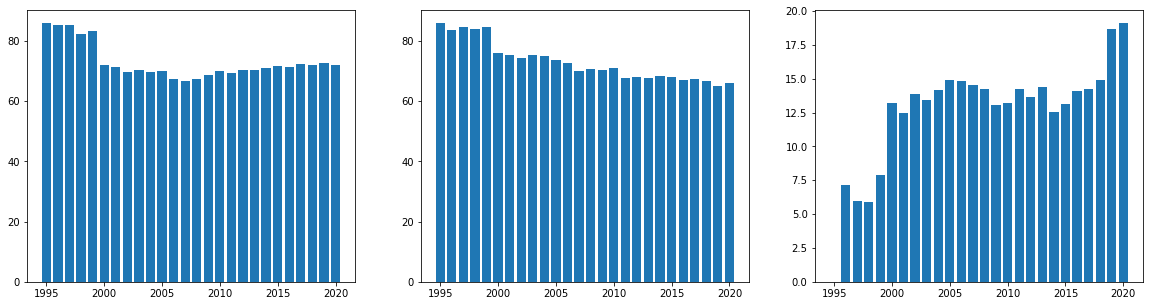

In [43]:
#critic and user score and percent difference average throughout the years
fig, axes = plt.subplots(1,3, sharex=True, figsize=(20,5))
axes[0].bar(x=years_avg.index, height=years_avg['critic score'])
axes[1].bar(x=years_avg.index, height=years_avg['user score'])
axes[2].bar(x=years_avg.index, height=years_avg['percent_difference'])

In [44]:
# critic, user and game count throughtout the years
years_count = game_scores.groupby('r-year')['critics amount','users amount'].sum()
years_count['game count'] = game_scores.groupby('r-year')['name'].count()
years_count

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,critics amount,users amount,game count
r-year,,,
1995,8,181,1
1996,187,5820,20
1997,314,7785,27
1998,601,21237,45
1999,827,10549,52
2000,5340,29165,355
2001,8321,34328,546
2002,13127,34381,786
2003,16899,47410,811


<BarContainer object of 26 artists>

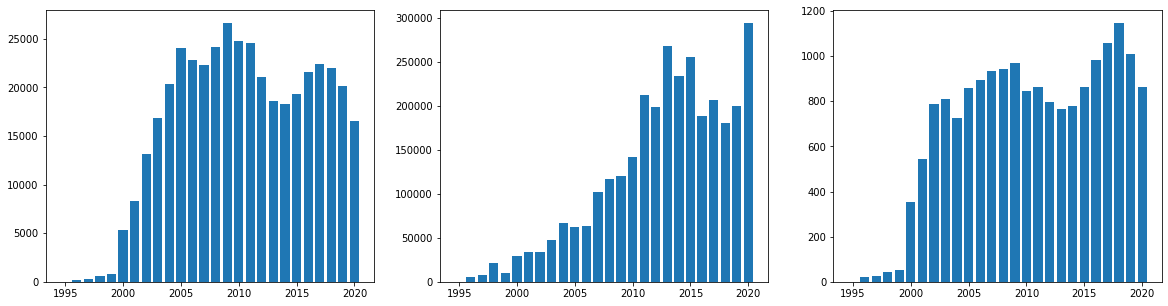

In [45]:
fig, axes = plt.subplots(1,3, sharex=True, figsize=(20,5))
axes[0].bar(x=years_count.index, height=years_count['critics amount'])
axes[1].bar(x=years_count.index, height=years_count['users amount'])
axes[2].bar(x=years_count.index, height=years_count['game count'])